In [4]:
from scipy.interpolate import lagrange
x = np.array([0, 1, 2])
y = x ** 3
lagrange(x,y)
lagrange(x,y)(2)

poly1d([ 3., -2.,  0.])

8.0

In [5]:
x
y

array([0, 1, 2])

array([0, 1, 8], dtype=int32)

In [26]:
f = open(r'C:\usr\longfengpili\pydata\jupyter\Python数据分析与挖掘实战\原书代码数据\chapter4\demo\data\normalization_data.xls',
         'rb')
data = pd.read_excel(f,header=None)
f.close()

In [27]:
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [28]:
(data-data.min())/(data.max()-data.min()) #最小-最大规范化

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [29]:
(data-data.mean())/data.std() #零-均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [30]:
data/10**np.ceil(np.log10(data.abs().max())) #小数定标规范化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


In [31]:
f = open('./原书代码数据/chapter4/demo/data/discretization_data.xls','rb')
data = pd.read_excel(f)
f.close()

In [33]:
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [36]:
data = data['肝气郁结证型系数'].copy()

In [38]:
type(data)
data.head()

pandas.core.series.Series

0    0.056
1    0.488
2    0.107
3    0.322
4    0.242
Name: 肝气郁结证型系数, dtype: float64

In [39]:
d1 = pd.cut(data,4,labels=range(4))  #等宽离散化

In [86]:
#等频离散化
w = [1.0*i/4 for i in range(4+1)]
w = data.describe(percentiles=w)[4:4+4+1]
w
d2 = pd.cut(data,w,labels=range(4))

0%      0.02600
25%     0.17625
50%     0.23100
75%     0.28175
100%    0.50400
Name: 肝气郁结证型系数, dtype: float64

In [97]:
#K-Means算法 聚类分析方法
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=4,n_jobs=2) #建立模型，n_jobs是并行数，一般等于cpu数较好
kmodel.fit(data.to_frame())#训练模型
c = DataFrame(kmodel.cluster_centers_).sort_values(by=0)#输出聚类中心，并且排序
w = c.rolling(2).mean()[1:][0]  #求两个聚类中心的中点，作为边界点
w = [0] + list(w) + [data.max()]
w
d3 = pd.cut(data,w,labels=range(4))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[0, 0.17869758895131088, 0.25772406433683875, 0.3518431813603706, 0.504]

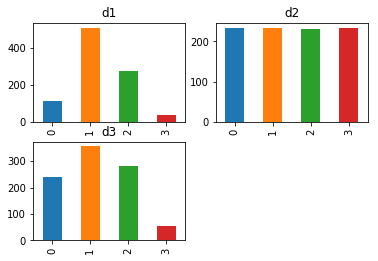

In [110]:
fig = plt.figure()
fig.add_subplot(221)
d1.value_counts().sort_index().plot(kind='bar',title='d1')
fig.add_subplot(222)
d2.value_counts().sort_index().plot(kind='bar',title='d2')
fig.add_subplot(223)
d3.value_counts().sort_index().plot(kind='bar',title='d3')

In [120]:
def cluster_plot(d,k):
    plt.figure()
    for j in range(0,k):
        plt.plot(data[d==j],[i for i in d[d==j]],'o')
    plt.ylim(-0.5,k-0.5)
    return plt

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

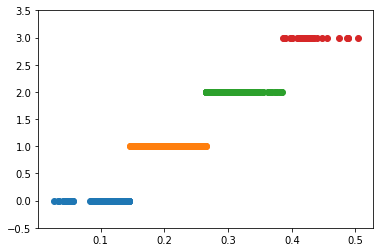

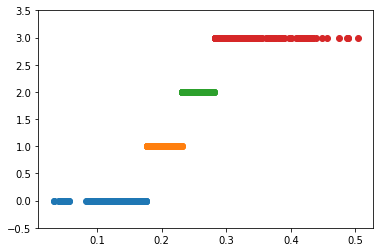

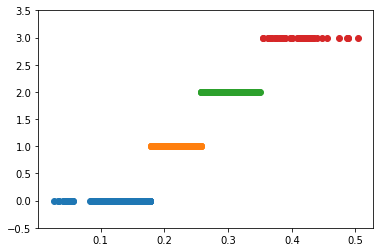

In [132]:
cluster_plot(d1,4)
cluster_plot(d2,4)
cluster_plot(d3,4)

In [1]:
f = open('./原书代码数据/chapter4/demo/data/electricity_data.xls','rb')
data = pd.read_excel(f)
f.close()

In [3]:
data['线损率'] = 1-data['供出电量']/data['供入电量']

In [4]:
data

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


In [18]:
f = open('./原书代码数据/chapter4/demo/data/principal_component.xls','rb')
data = pd.read_excel(f,header=None)
f.close()

In [22]:
#主成分分析降维代码
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
pca.components_ #返回模型的特征向量
pca.explained_variance_ratio_ #返回各个成分各自的方差百分比

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
        -0.10681901,  0.63233277,  0.04720838],
       [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
         0.52280144,  0.31167833,  0.0754221 ],
       [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
         0.18985251, -0.69902952,  0.04505823],
       [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
        -0.34598258, -0.02090066,  0.02137393]])

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])